# Telecommunication Case Study


### Business Understanding

The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators raised the level of competition. Companies are working hard to survive in this competitive market depending on multiple strategies. Three main strategies have been proposed to generate more revenues: 
1. Acquire new customers 
2. Upsell the existing customers
3. Increase the retention period of customers 
However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy, proving that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. To apply the third strategy, companies have to decrease the potential of customer’s churn, known as "the customer movement from one provider to another".

Customer churn is a considerable concern in service sectors with high competitive services. On the other hand, predicting the customers who are likely to leave the company will represent a potentially large additional revenue source if it is done in the early phase.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.


### TASK

Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

Step - 1: Load the data

Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
	- For regression task - Mean Absolute Error
	- For classification task - Accuracy
    
Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

Step - 4: Data preparation on train data:

- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 5: Data preparation on test data:

- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:

- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest

Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy(actual, predict).

Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction.


### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

### Load The Data

In [2]:
df=pd.read_csv('churn_dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Identify Unused Column & Drop the Column

In [4]:
df=df.drop('customerID',axis=1)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Cleaning the Data

In [8]:
import re

In [9]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x:re.sub(" ",'0',str(x)))
df['TotalCharges']=df['TotalCharges'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Identifying missing values in columns

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Identifying The Outliers

<AxesSubplot:>

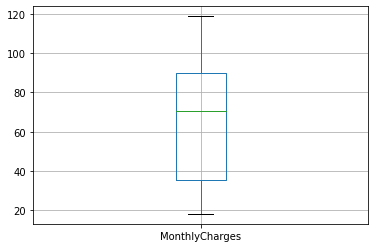

In [12]:
df.boxplot(column=['MonthlyCharges'])

### Identify the input and output/target variables

In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Identify the Target Variable and Splitting the Data into Train and Test

In [14]:
import sklearn

In [15]:
# Identifying the inputs (X) and output (y)

y = df['Churn']

X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

### Split into train and test

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [17]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3296,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
6397,Male,1,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6043,Male,0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
5309,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80
3000,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


In [18]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2200,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25
4627,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50
3225,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85
2828,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45
3768,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40


In [19]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [20]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


### Separating Categorical and Numerical Columns:

In [21]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3296,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
6397,Male,1,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6043,Male,0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
5309,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80
3000,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


In [22]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [23]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3296,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
6397,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check
5309,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [24]:
X_train_num = X_train.select_dtypes(include=['float', 'int'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0,24,49.30,1233.25
6397,1,54,65.25,3529.95
6043,0,3,40.15,130.75
5309,0,61,20.25,1278.80
3000,0,12,84.45,1059.55


### Scaling the Numerical Features

In [25]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0,24,49.30,1233.25
6397,1,54,65.25,3529.95
6043,0,3,40.15,130.75
5309,0,61,20.25,1278.80
3000,0,12,84.45,1059.55


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,-0.435476,-0.340191,-0.514314,-0.460284
6397,2.296336,0.883210,0.017840,0.556508
6043,-0.435476,-1.196572,-0.819594,-0.948382
5309,-0.435476,1.168670,-1.483535,-0.440119
3000,-0.435476,-0.829552,0.658427,-0.537185


### Applying OneHotEncoding on Categorical Columns

In [27]:
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3296,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
6397,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check
5309,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [28]:
X_train_cat['gender'].value_counts(normalize=True)

Female    0.502272
Male      0.497728
Name: gender, dtype: float64

In [29]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.515524
Yes    0.484476
Name: Partner, dtype: float64

In [30]:
X_train_cat['Dependents'].value_counts(normalize=True)

No     0.698788
Yes    0.301212
Name: Dependents, dtype: float64

In [31]:
X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.904014
No     0.095986
Name: PhoneService, dtype: float64

In [32]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.482772
Yes                 0.421242
No phone service    0.095986
Name: MultipleLines, dtype: float64

In [33]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.439606
DSL            0.343809
No             0.216585
Name: InternetService, dtype: float64

In [34]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.494888
Yes                    0.288527
No internet service    0.216585
Name: OnlineSecurity, dtype: float64

In [35]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.439228
Yes                    0.344188
No internet service    0.216585
Name: OnlineBackup, dtype: float64

In [36]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.441499
Yes                    0.341916
No internet service    0.216585
Name: DeviceProtection, dtype: float64

In [37]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.498107
Yes                    0.285309
No internet service    0.216585
Name: TechSupport, dtype: float64

In [38]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.400606
Yes                    0.382810
No internet service    0.216585
Name: StreamingTV, dtype: float64

In [39]:
X_train_cat['StreamingMovies'].value_counts(normalize=True)

No                     0.397009
Yes                    0.386407
No internet service    0.216585
Name: StreamingMovies, dtype: float64

In [40]:
X_train_cat['Contract'].value_counts(normalize=True)

Month-to-month    0.553200
Two year          0.235706
One year          0.211094
Name: Contract, dtype: float64

In [41]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.597501
No     0.402499
Name: PaperlessBilling, dtype: float64

In [42]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.334532
Mailed check                 0.230973
Bank transfer (automatic)    0.219992
Credit card (automatic)      0.214502
Name: PaymentMethod, dtype: float64

In [43]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3264,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2607,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3264,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2607,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [45]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,-0.435476,-0.340191,-0.514314,-0.460284,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,2.296336,0.883210,0.017840,0.556508,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,-0.435476,-1.196572,-0.819594,-0.948382,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,-0.435476,1.168670,-1.483535,-0.440119,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000,-0.435476,-0.829552,0.658427,-0.537185,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Preparing Test Data

In [46]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [47]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2200,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25
4627,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50
3225,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85
2828,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45
3768,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40


In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   object

In [49]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2200,Female,No,No,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check
4627,Male,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic)
3225,Female,No,No,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
2828,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
3768,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [50]:
X_test_num=X_test.select_dtypes(include=['float','int64'])

In [51]:
X_test_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,0,19,58.20,1045.25
4627,0,60,116.60,7049.50
3225,0,13,71.95,923.85
2828,0,1,20.45,20.45
3768,0,55,77.75,4266.40
...,...,...,...,...
3184,0,71,83.30,5894.50
2551,0,12,19.45,227.45
5735,0,48,20.00,935.90
5096,0,71,86.85,6263.80


In [52]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,-0.435476,-0.544091,-0.217375,-0.543516
4627,-0.435476,1.127890,1.731076,2.114680
3225,-0.435476,-0.788772,0.241378,-0.597262
2828,-0.435476,-1.278132,-1.476862,-0.997214
3768,-0.435476,0.923990,0.434889,0.882549


In [53]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3768,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [54]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,-0.435476,-0.544091,-0.217375,-0.543516,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,-0.435476,1.127890,1.731076,2.114680,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3225,-0.435476,-0.788772,0.241378,-0.597262,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2828,-0.435476,-1.278132,-1.476862,-0.997214,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3768,-0.435476,0.923990,0.434889,0.882549,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
regressor = KNeighborsClassifier()
regressor.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [56]:
y_test_pred = regressor.predict(X_test_transformed)

In [57]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.7467348097671778

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_transformed, y_train)

C:\Users\saiki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [61]:
y_test_pred = classifier.predict(X_test_transformed)

In [62]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No


In [63]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.7978421351504826

# Support Vector Machines

In [64]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
clf.fit(X_train_transformed, y_train) 

SVC(kernel='linear')

In [65]:
y_test_pred =clf.predict(X_test_transformed)

In [66]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No


In [67]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.7955706984667802

# Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [69]:
y_test_pred =classifier.predict(X_test_transformed)

In [70]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No


In [71]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.7399204997160704

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [73]:
y_test_pred =clf1.predict(X_test_transformed)

In [74]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No


In [75]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.7762634866553095

In [76]:
import matplotlib.pyplot as plt
data={"Algorithms":['knearestneighbours','LogisticRegression','SupportVectorMachine','RandomForest','DecisionTree'],
      "prediction_percentage":[74.6,79.7,79.5,77.6,73.9]}
data_=pd.DataFrame(data)
data_

,Algorithms,prediction_percentage
0,knearestneighbours,74.6
1,LogisticRegression,79.7
2,SupportVectorMachine,79.5
3,RandomForest,77.6
4,DecisionTree,73.9


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

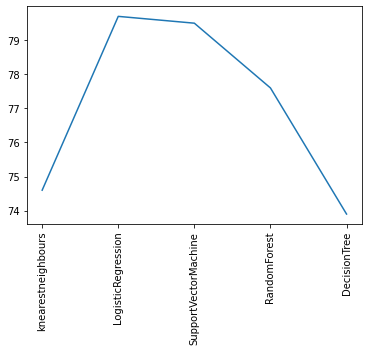

In [77]:
plt.plot(data_['Algorithms'],data_['prediction_percentage'])
plt.xticks(rotation=90)